<h1>Stock Market Analysis</h1>

In [1]:
from __future__ import division

In [2]:
#data imports 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import DataReader
from datetime import datetime 

c:\users\ebinp\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#declaring the list stock ticker for major tech companies like Apple, Google, Microsoft and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#getting the current date
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

#globals uses the value from the RHS and converts it into a global variable
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
#Apple stock DataFrame
AAPL.head()

#the string name from the tech_list is converted into a DataFrame 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461
2019-04-29,205.970001,203.860001,204.399994,204.610001,22204700.0,201.966461
2019-04-30,203.399994,199.110001,203.059998,200.669998,46534900.0,198.077362
2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,207.800110


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,245.821620,240.308459,242.749841,243.280671,3.339773e+07,242.254871
std,43.231709,41.982066,42.473172,42.845108,1.730345e+07,43.384740
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.500000,203.500000,204.399994,204.610001,2.181180e+07,202.635223
50%,242.199997,234.880005,237.520004,239.960007,2.825340e+07,238.675293
75%,280.790009,271.859985,276.279999,275.429993,3.813280e+07,275.429993
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-25 to 2020-04-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


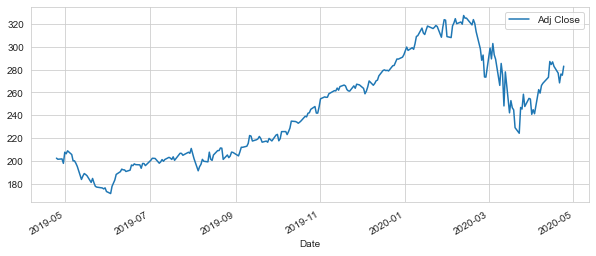

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
plt.show()

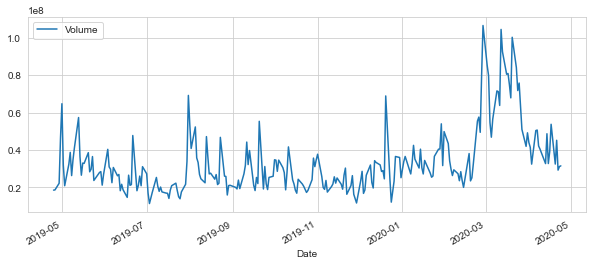

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [10]:
ma_day = [10,20,50]

In [14]:
#Moving average for AAPL
for ma in ma_day:
    column_name = "MA for "+str(ma)+" days"
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

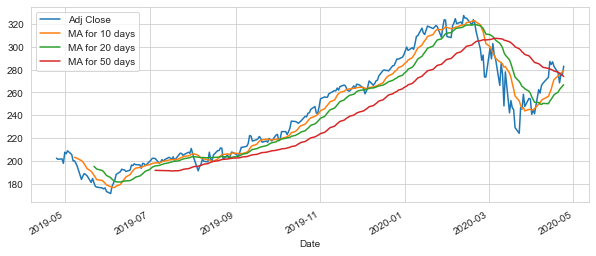

In [16]:
#MA is the abbrevation for Moving Average
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
plt.show()

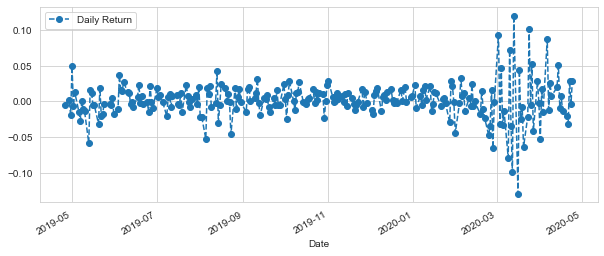

In [17]:
#daily returns and risk in the stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True,linestyle="--",marker='o')
plt.show()

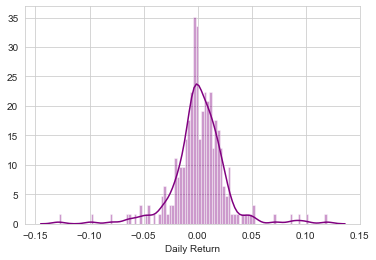

In [18]:
#Average data return can be done using histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
plt.show()

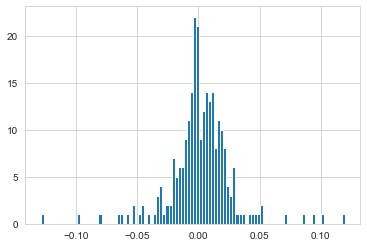

In [19]:
#the above plot can be done in a short way given below
AAPL['Daily Return'].hist(bins=100)
plt.show()

In [20]:
#To analyse all the stocks returned
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-25,NaN,NaN,NaN,NaN
2019-04-26,-0.004774,0.006910,0.005730,0.025433
2019-04-29,0.001517,0.012105,-0.000924,-0.006254
2019-04-30,-0.019256,-0.076966,0.006396,-0.006144
2019-05-01,0.049086,-0.017165,-0.020827,-0.007786


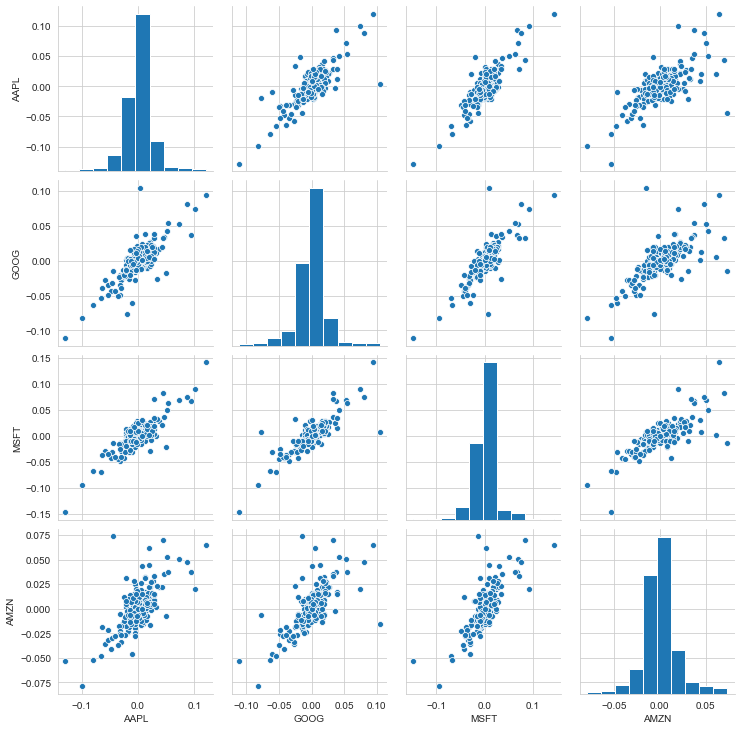

In [24]:
#pairplots
sns.pairplot(tech_rets.dropna())
plt.show()

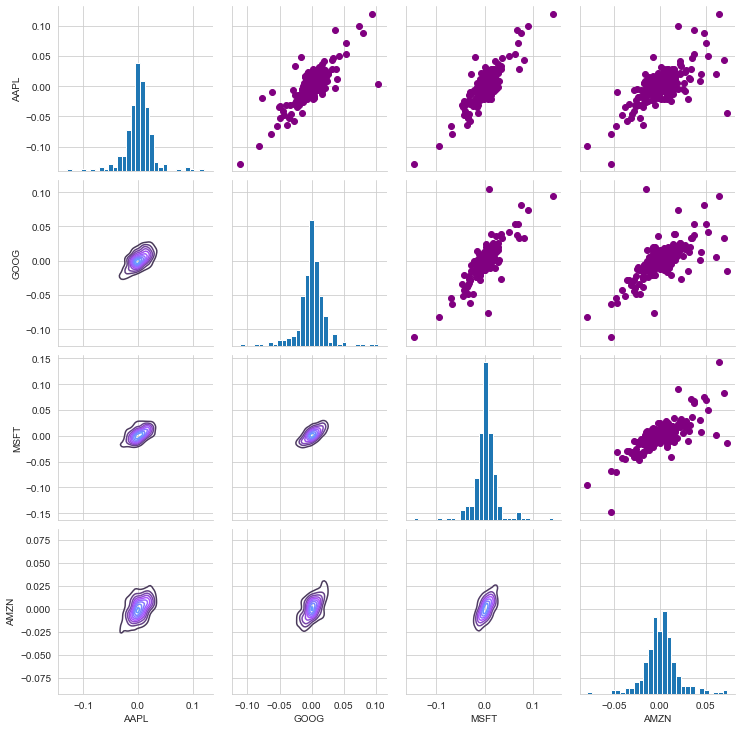

In [26]:
#manually creating the pairplot
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.show()

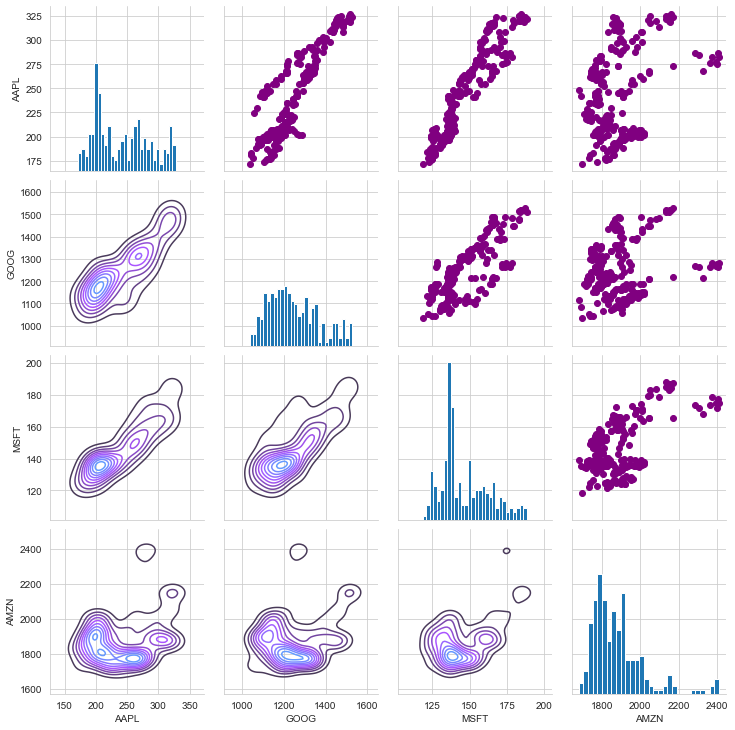

In [27]:
#manually creating the pairplot for closing prices
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.show()

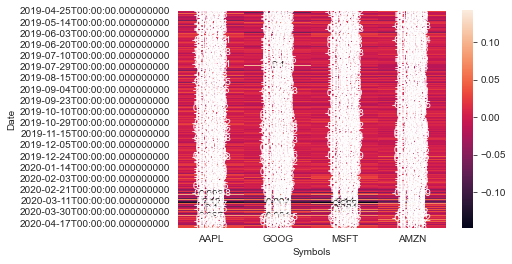

In [29]:
#heatmaps for the Apple, Google, Microsoft and Amazon
sns.heatmap(tech_rets,annot=True)
plt.show()

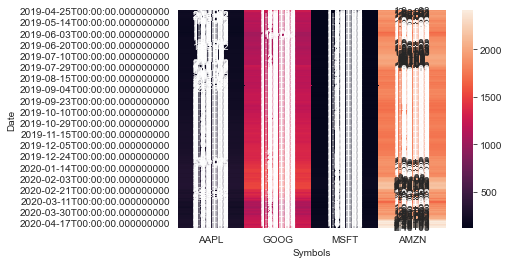

In [30]:
#Heatmap on closing prize
sns.heatmap(closing_df,annot=True)
plt.show()

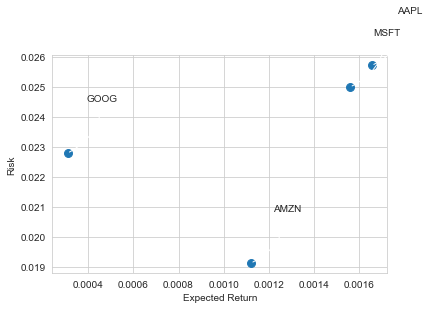

In [31]:
#stock and its risks
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords = 'offset points', ha='right',va='bottom',
        arrowprops = dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3')
    )

#zip allows to call all the things inside at once
plt.show()

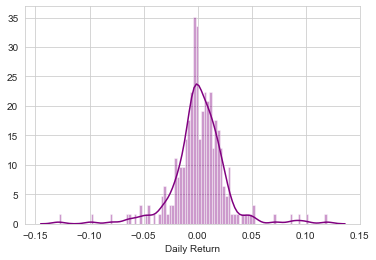

-0.034258428085985886


In [32]:
#Value at risks
#look at the wikipedia page of the quantile
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
plt.show()
print(rets['AAPL'].quantile(0.05))